<a href="https://colab.research.google.com/github/Sahanmee/Machine-Learning-Coursework/blob/main/2425450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Quick exploration

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [45]:
#Drop duplicates
df.shape

(7043, 21)

In [46]:
duplicates = df[df.duplicated()]
duplicates.shape
#There are no duplicates

(0, 21)

## Missing Data

In [47]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##Visualizing

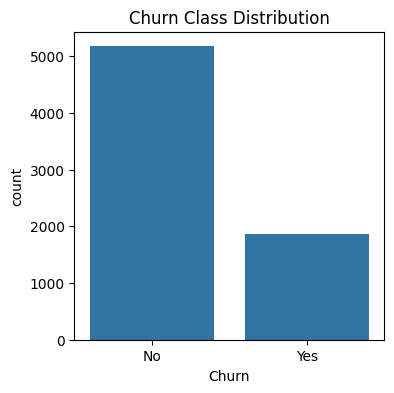

In [48]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x="Churn")
plt.title("Churn Class Distribution")
plt.show()

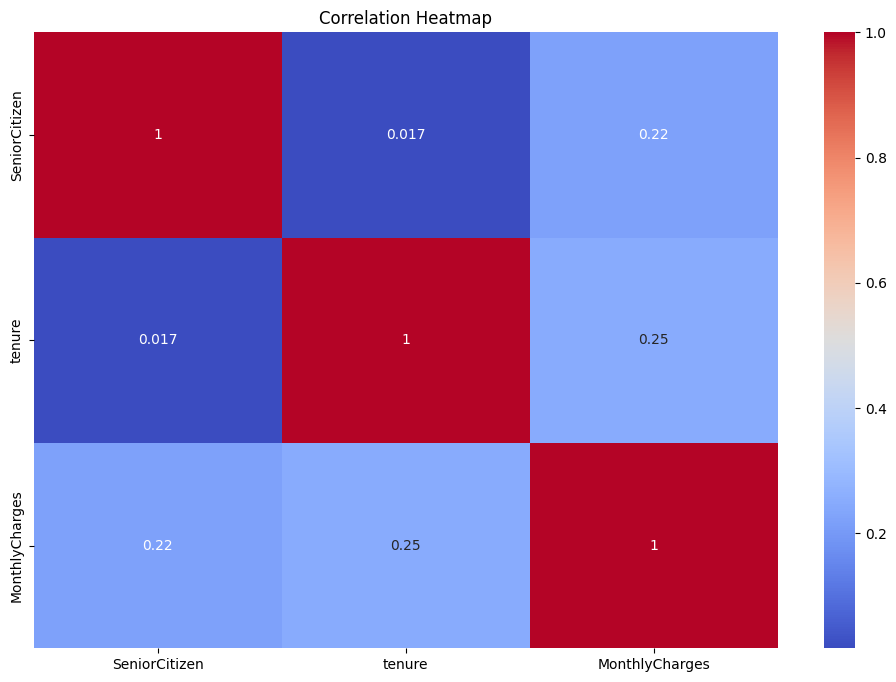

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

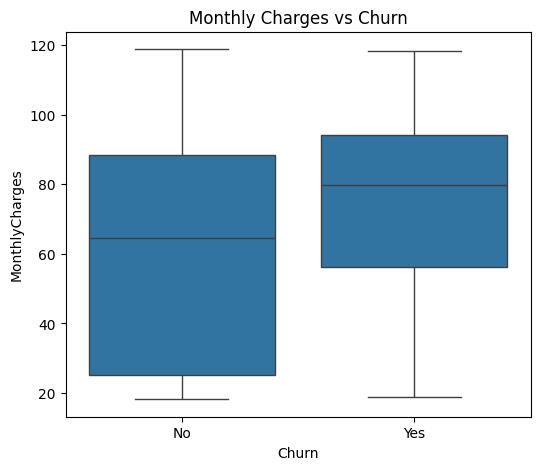

In [50]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()

# **Data Preprocessing**

In [51]:
df = df.drop(['customerID', 'PaymentMethod'], axis=1)
#Removing customerID and PaymentMethod Columns

In [52]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes


In [59]:
from sklearn import preprocessing

# Encoder for 'gender'
le_gender = preprocessing.LabelEncoder()
# Check if the column still contains string values before fitting and transforming
if df['gender'].dtype == 'object':
    le_gender.fit(['Female','Male'])
    df['gender'] = le_gender.transform(df['gender'])
    #Female = 0, Male = 1
else:
    print("Column 'gender' is already numeric, skipping encoding.")

# Encoder for 'Partner'
le_partner = preprocessing.LabelEncoder()
if df['Partner'].dtype == 'object':
    le_partner.fit(['Yes','No'])
    df['Partner'] = le_partner.transform(df['Partner'])
    #Yes = 1, No = 0
else:
    print("Column 'Partner' is already numeric, skipping encoding.")

# Encoder for 'Dependents'
le_dependents = preprocessing.LabelEncoder()
if df['Dependents'].dtype == 'object':
    le_dependents.fit(['Yes','No'])
    df['Dependents'] = le_dependents.transform(df['Dependents'])
    #Yes = 1, No = 0
else:
    print("Column 'Dependents' is already numeric, skipping encoding.")

# Encoder for 'PhoneService'
le_phoneservice = preprocessing.LabelEncoder()
if df['PhoneService'].dtype == 'object':
    le_phoneservice.fit(['Yes','No'])
    df['PhoneService'] = le_phoneservice.transform(df['PhoneService'])
    #Yes = 1, No = 0
else:
    print("Column 'PhoneService' is already numeric, skipping encoding.")

# Encoder for 'MultipleLines'
le_multiplelines = preprocessing.LabelEncoder()
if df['MultipleLines'].dtype == 'object':
    le_multiplelines.fit(['Yes','No','No phone service'])
    df['MultipleLines'] = le_multiplelines.transform(df['MultipleLines'])
    #No phone service = 0, No = 1, Yes = 2
else:
    print("Column 'MultipleLines' is already numeric, skipping encoding.")

# Encoder for 'InternetService'
le_internetservice = preprocessing.LabelEncoder()
if df['InternetService'].dtype == 'object':
    le_internetservice.fit(['DSL','Fiber optic','No'])
    df['InternetService'] = le_internetservice.transform(df['InternetService'])
    #DSL = 0, Fiber optic = 1, No = 2
else:
    print("Column 'InternetService' is already numeric, skipping encoding.")

# Encoder for 'OnlineSecurity'
le_onlinesecurity = preprocessing.LabelEncoder()
if df['OnlineSecurity'].dtype == 'object':
    le_onlinesecurity.fit(['Yes','No','No internet service'])
    df['OnlineSecurity'] = le_onlinesecurity.transform(df['OnlineSecurity'])
    #No = 0, No internet service = 1, Yes = 2
else:
    print("Column 'OnlineSecurity' is already numeric, skipping encoding.")

# Encoder for 'OnlineBackup'
le_onlinebackup = preprocessing.LabelEncoder()
if df['OnlineBackup'].dtype == 'object':
    le_onlinebackup.fit(['Yes','No','No internet service'])
    df['OnlineBackup'] = le_onlinebackup.transform(df['OnlineBackup'])
    #No = 0, No internet service = 1, Yes = 2
else:
    print("Column 'OnlineBackup' is already numeric, skipping encoding.")

# Encoder for 'DeviceProtection'
le_deviceprotection = preprocessing.LabelEncoder()
if df['DeviceProtection'].dtype == 'object':
    le_deviceprotection.fit(['Yes','No','No internet service'])
    df['DeviceProtection'] = le_deviceprotection.transform(df['DeviceProtection'])
    #No = 0, No internet service = 1, Yes = 2
else:
    print("Column 'DeviceProtection' is already numeric, skipping encoding.")

# Encoder for 'TechSupport'
le_techsupport = preprocessing.LabelEncoder()
if df['TechSupport'].dtype == 'object':
    le_techsupport.fit(['Yes','No','No internet service'])
    df['TechSupport'] = le_techsupport.transform(df['TechSupport'])
    #No = 0, No internet service = 1, Yes = 2
else:
    print("Column 'TechSupport' is already numeric, skipping encoding.")

# Encoder for 'StreamingTV'
le_streamingtv = preprocessing.LabelEncoder()
if df['StreamingTV'].dtype == 'object':
    le_streamingtv.fit(['Yes','No','No internet service'])
    df['StreamingTV'] = le_streamingtv.transform(df['StreamingTV'])
    #No = 0, No internet service = 1, Yes = 2
else:
    print("Column 'StreamingTV' is already numeric, skipping encoding.")

# Encoder for 'StreamingMovies'
le_streamingmovies = preprocessing.LabelEncoder()
if df['StreamingMovies'].dtype == 'object':
    le_streamingmovies.fit(['Yes','No','No internet service'])
    df['StreamingMovies'] = le_streamingmovies.transform(df['StreamingMovies'])
    #No = 0, No internet service = 1, Yes = 2
else:
    print("Column 'StreamingMovies' is already numeric, skipping encoding.")

# Encoder for 'Contract'
le_contract = preprocessing.LabelEncoder()
if df['Contract'].dtype == 'object':
    le_contract.fit(['Month-to-month','One year','Two year'])
    df['Contract'] = le_contract.transform(df['Contract'])
    #Month-to-month = 0, One year = 1, Two year = 2
else:
    print("Column 'Contract' is already numeric, skipping encoding.")

# Encoder for 'PaperlessBilling'
le_paperlessbilling = preprocessing.LabelEncoder()
if df['PaperlessBilling'].dtype == 'object':
    le_paperlessbilling.fit(['Yes','No'])
    df['PaperlessBilling'] = le_paperlessbilling.transform(df['PaperlessBilling'])
    #No = 0, Yes = 1
else:
    print("Column 'PaperlessBilling' is already numeric, skipping encoding.")

# Encoder for 'Churn'
le_churn = preprocessing.LabelEncoder()
if df['Churn'].dtype == 'object':
    le_churn.fit(['Yes','No'])
    df['Churn'] = le_churn.transform(df['Churn'])
    #No = 0, Yes = 1
else:
    print("Column 'Churn' is already numeric, skipping encoding.")


Column 'gender' is already numeric, skipping encoding.


In [60]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1


In [62]:
#Splitting into Training and Testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)